<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, shutil

In [ ]:
original_dataset_dir = '/content/drive/MyDrive/Colab Notebooks/train' # where all datasets will be downloaded
base_dir = '/content/cats_and_dogs_small'     # where small datasets will be stored
os.mkdir(base_dir)

#where train datasets(part of small datasets will be stored)
train_dir = os.path.join(base_dir, 'train')
print(f"Train directory is {train_dir}")
os.mkdir(train_dir)

#where validation datasets will be stored
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

#where test datasets will be stored
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

#where cats train datasets will be stored
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

#where dogs train datasets will be stored
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

#where cats validation datasets will be stored
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#where dogs validation datasets will be stored
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#where cats test datasets will be stored
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#where dogs test datasets will be stored
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Train directory is /content/cats_and_dogs_small/train


In [ ]:
fnames = ['dog.{}.jpg'.format(i )for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src , dst)

fnames = ['dog.{}.jpg'.format(i )for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src , dst)

fnames = ['dog.{}.jpg'.format(i )for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src , dst)


In [ ]:
fnames = ['cat.{}.jpg'.format(i )for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src , dst)

fnames = ['cat.{}.jpg'.format(i )for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src , dst)

fnames = ['cat.{}.jpg'.format(i )for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src , dst)


In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3),activation = 'relu' , input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#**Why we need generator and fit_generator**
##When we call the **.fit()** function it makes assumptions:
*  The entire training set can fit into the Random Access Memory (RAM) of the computer.
*Calling the model. fit method for a second time is not going to reinitialize our already trained weights, which means we can actually make consecutive calls to fit if we want to and then manage it properly.
*There is no need for using the Keras generators(i.e no data argumentation)
*Raw data is itself used for training our network and our raw data will only fit into the memory.
##When we call the **.fit_generator()** function it makes assumptions:
*Keras is first calling the generator function(dataAugmentaion)
Generator function(dataAugmentaion) provides a batch_size of 20 to our .fit_generator() function.
*our **.fit_generator()** function first accepts a batch of the dataset, then performs backpropagation on it, and then updates the weights in our model.
*For the number of epochs specified(30 in our case) the process is repeated.
#**Summary**
* **.fit** is used when the entire training dataset can fit into the memory and no data augmentation is applied.
* **.fit_generator** is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),#to resize all image to 150 x 150
batch_size=20,
class_mode='binary') #beacause we use binary crossentropy)

Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch , labels_batch in train_generator:
  print("data batch shape ",data_batch.shape)
  print("label batch shape ",labels_batch.shape)
  break

data batch shape  (20, 150, 150, 3)
label batch shape  (20,)


In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 77s 766ms/step - loss: 0.6877 - acc: 0.5540 - val_loss: 0.6896 - val_acc: 0.5360
Epoch 2/30
100/100 [==============================] - 81s 811ms/step - loss: 0.6497 - acc: 0.6160 - val_loss: 0.6307 - val_acc: 0.6620
Epoch 3/30
100/100 [==============================] - 80s 794ms/step - loss: 0.5991 - acc: 0.6805 - val_loss: 0.6118 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 86s 863ms/step - loss: 0.5616 - acc: 0.7025 - val_loss: 0.5978 - val_acc: 0.6640
Epoch 5/30
100/100 [==============================] - 90s 900ms/step - loss: 0.5347 - acc: 0.7340 - val_loss: 0.5972 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 77s 769ms/step - loss: 0.5056 - acc: 0.7560 - val_loss: 0.5658 - val_acc: 0.7090
Epoch 7/30
100/100 [==============================] - 103s 1s/step - loss: 0.4789 - acc: 0.7750 - val_loss: 0.5790 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 78s 780ms/step

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

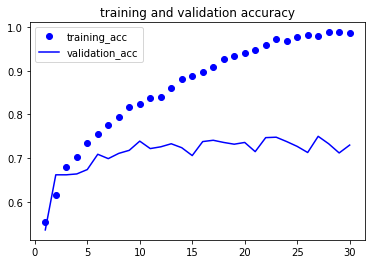

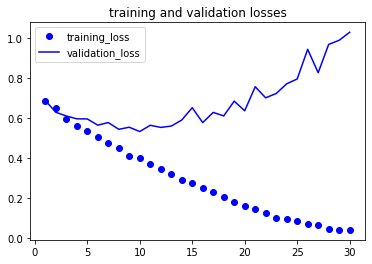

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1,31))
plt.plot(epochs,history.history["acc"],'bo',label = 'training_acc')
plt.plot(epochs,history.history["val_acc"],'b',label = 'validation_acc')
plt.title("training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs,history.history["loss"],'bo',label = 'training_loss')
plt.plot(epochs,history.history["val_loss"],'b',label = 'validation_loss')
plt.title("training and validation losses")
plt.legend()

plt.show()

# Using data augmentation and drop out to increase model accuracy

In [ ]:
data_gen = ImageDataGenerator(rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
from keras.preprocessing import image #Module with imagepreprocessing utilities

file_names = [os.path.join(train_cats_dir , fname) for fname in os.listdir(train_cats_dir)] #to stack all cate image paths in a list

image_path = file_names[3] #choose one to augment

img = image.load_img(image_path,target_size = (150,150)) #read image and resize it

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape) #Reshapes it to (1, 150, 150, 3)

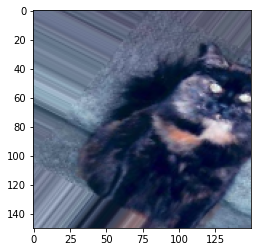

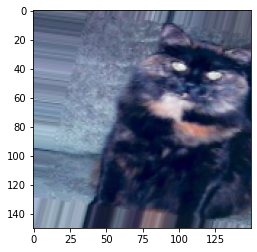

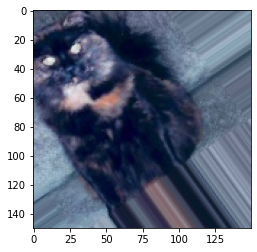

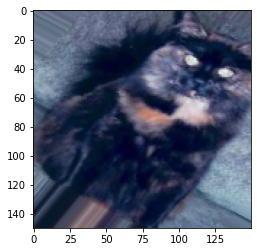

In [ ]:
i = 0
for batch in data_gen.flow(x,batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3) , activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3) , activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3) , activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3) , activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy' ,optimizer=optimizers.RMSprop(lr=1e-4),metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    )

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_genarator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size=(150,150),
                                                    batch_size = 30 ,
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_genarator = test_datagen.flow_from_directory(train_dir ,
                                                    target_size=(150,150),
                                                    batch_size = 30 ,
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator , steps_per_epoch = 100 ,epochs = 100,validation_data=validation_genarator,validation_steps = 50)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


100/100 [==============================] - 77s 761ms/step - loss: 0.6890 - acc: 0.5150 - val_loss: 0.6677 - val_acc: 0.6140
Epoch 2/100
100/100 [==============================] - 76s 763ms/step - loss: 0.6657 - acc: 0.5980 - val_loss: 0.6349 - val_acc: 0.6440
Epoch 3/100
100/100 [==============================] - 77s 766ms/step - loss: 0.6403 - acc: 0.6300 - val_loss: 0.6087 - val_acc: 0.6560
Epoch 4/100
100/100 [==============================] - 76s 757ms/step - loss: 0.5970 - acc: 0.6765 - val_loss: 0.5851 - val_acc: 0.6760
Epoch 5/100
100/100 [==============================] - 76s 765ms/step - loss: 0.5688 - acc: 0.6930 - val_loss: 0.5254 - val_acc: 0.7500
Epoch 6/100
100/100 [==============================] - 78s 782ms/step - loss: 0.5442 - acc: 0.7180 - val_loss: 0.5146 - val_acc: 0.7553
Epoch 7/100
100/100 [==============================] - 76s 766ms/step - loss: 0.5223 - acc: 0.7415 - val_loss: 0.4820 - val_acc: 0.7673
Epoch 8/100
100/100 [==============================] - 76s 7

In [ ]:
model.save('cats_and_dogs_small_2.h5')

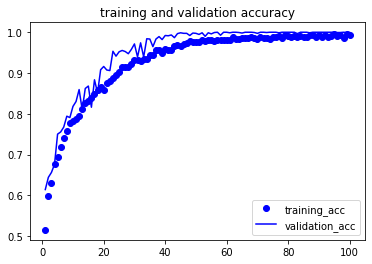

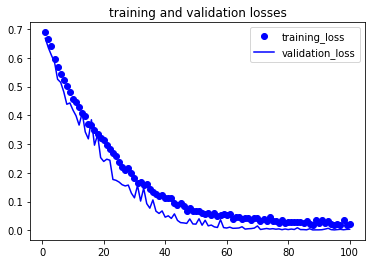

In [ ]:
epochs = list(range(1,101))
plt.plot(epochs,history.history["acc"],'bo',label = 'training_acc')
plt.plot(epochs,history.history["val_acc"],'b',label = 'validation_acc')
plt.title("training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs,history.history["loss"],'bo',label = 'training_loss')
plt.plot(epochs,history.history["val_loss"],'b',label = 'validation_loss')
plt.title("training and validation losses")
plt.legend()

plt.show()